<a href="https://colab.research.google.com/github/agrawalshubham665/JP-Morgan-QuantResearch-Internship/blob/main/QuantTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load Libreries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pyplot
from scipy.stats import norm
import datetime as dt

In [ ]:
# Import data
Nat_gas = pd.read_csv("/content/Nat_Gas.csv",index_col=0)

In [ ]:
Nat_gas.tail(10)

,Prices
Dates,
12/31/23,12.8
1/31/24,12.6
2/29/24,12.4
3/31/24,12.7
4/30/24,12.1
5/31/24,11.4
6/30/24,11.5
7/31/24,11.6
8/31/24,11.5


In [ ]:
Nat_gas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 10/31/20 to 9/30/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0+ bytes


In [ ]:
Nat_gas.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


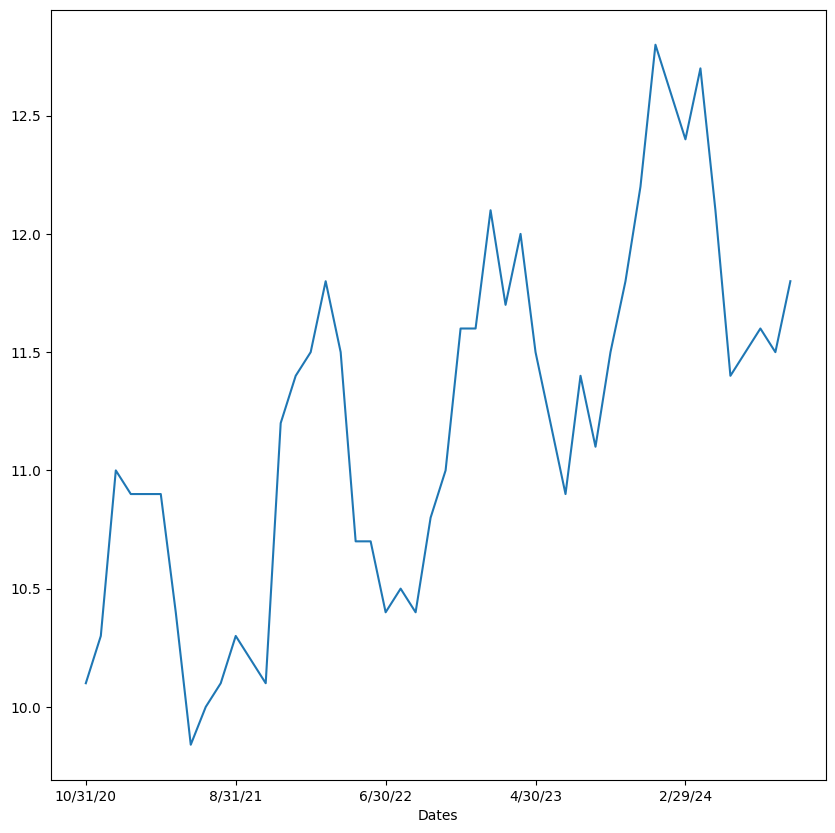

In [ ]:
ax=Nat_gas["Prices"].plot(figsize=(10,10))

In [ ]:
print(Nat_gas.index)

Index(['10/31/20', '11/30/20', '12/31/20', '1/31/21', '2/28/21', '3/31/21',
       '4/30/21', '5/31/21', '6/30/21', '7/31/21', '8/31/21', '9/30/21',
       '10/31/21', '11/30/21', '12/31/21', '1/31/22', '2/28/22', '3/31/22',
       '4/30/22', '5/31/22', '6/30/22', '7/31/22', '8/31/22', '9/30/22',
       '10/31/22', '11/30/22', '12/31/22', '1/31/23', '2/28/23', '3/31/23',
       '4/30/23', '5/31/23', '6/30/23', '7/31/23', '8/31/23', '9/30/23',
       '10/31/23', '11/30/23', '12/31/23', '1/31/24', '2/29/24', '3/31/24',
       '4/30/24', '5/31/24', '6/30/24', '7/31/24', '8/31/24', '9/30/24'],
      dtype='object', name='Dates')


In [ ]:
Nat_gas["SMA_3"]=Nat_gas.Prices.rolling(3).mean()
Nat_gas["SMA_12"]=Nat_gas.Prices.rolling(12).mean()

In [ ]:
Nat_gas

,Prices,SMA_3,SMA_12
Dates,,,
10/31/20,10.10,NaN,NaN
11/30/20,10.30,NaN,NaN
12/31/20,11.00,10.466667,NaN
1/31/21,10.90,10.733333,NaN
2/28/21,10.90,10.933333,NaN
3/31/21,10.90,10.900000,NaN
4/30/21,10.40,10.733333,NaN
5/31/21,9.84,10.380000,NaN
6/30/21,10.00,10.080000,NaN


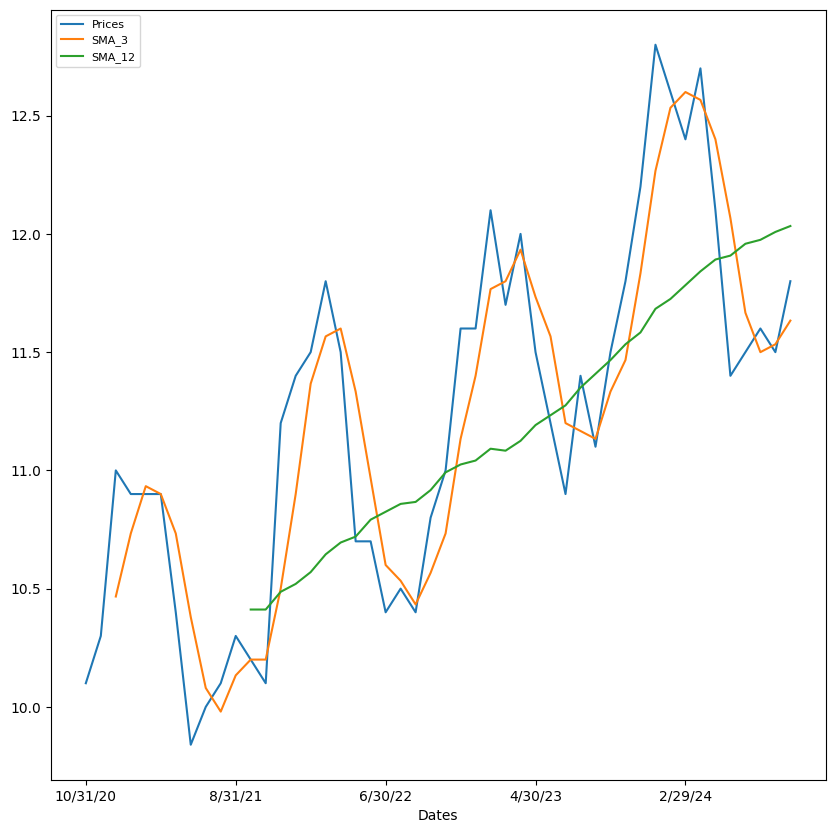

In [ ]:
Nat_gas.loc[:,["Prices","SMA_3","SMA_12"]].plot(figsize=(10,10))
plt.legend(loc="upper left",fontsize=8)
plt.show()

In [ ]:
time = np.arange(1, len(Nat_gas) + 1)
Nat_gas['time'] = time
data = Nat_gas[['time', 'Prices']]
data.tail()

,time,Prices
Dates,,
5/31/24,44,11.4
6/30/24,45,11.5
7/31/24,46,11.6
8/31/24,47,11.5
9/30/24,48,11.8


In [ ]:
time

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [ ]:
Nat_gas.tail()

,Prices,SMA_3,SMA_12,time
Dates,,,,
5/31/24,11.4,12.066667,11.908333,44
6/30/24,11.5,11.666667,11.958333,45
7/31/24,11.6,11.500000,11.975000,46
8/31/24,11.5,11.533333,12.008333,47
9/30/24,11.8,11.633333,12.033333,48


In [ ]:
reg = np.polyfit(data['time'], data["Prices"], deg = 1)
reg

array([ 0.03901324, 10.25125887])

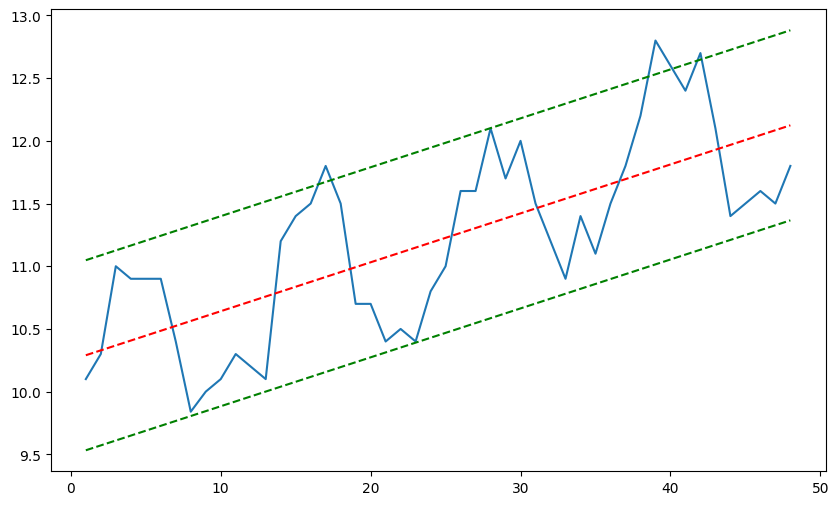

In [ ]:
trend = np.polyval(reg, data['time'])
std = data['Prices'].std()
plt.figure(figsize=(10,6))
plt.plot(data['time'].values, data['Prices'].values)
plt.plot(data['time'].values, trend, 'r--')
plt.plot(data['time'].values, trend - std, 'g--')
plt.plot(data['time'].values, trend + std, 'g--');

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result = seasonal_decompose(Nat_gas['Prices'], model='multiplicative',period = 12)

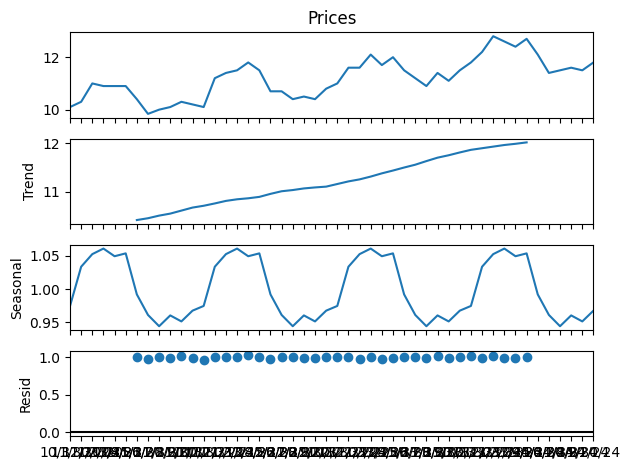

In [ ]:
result.plot()
plt.show()

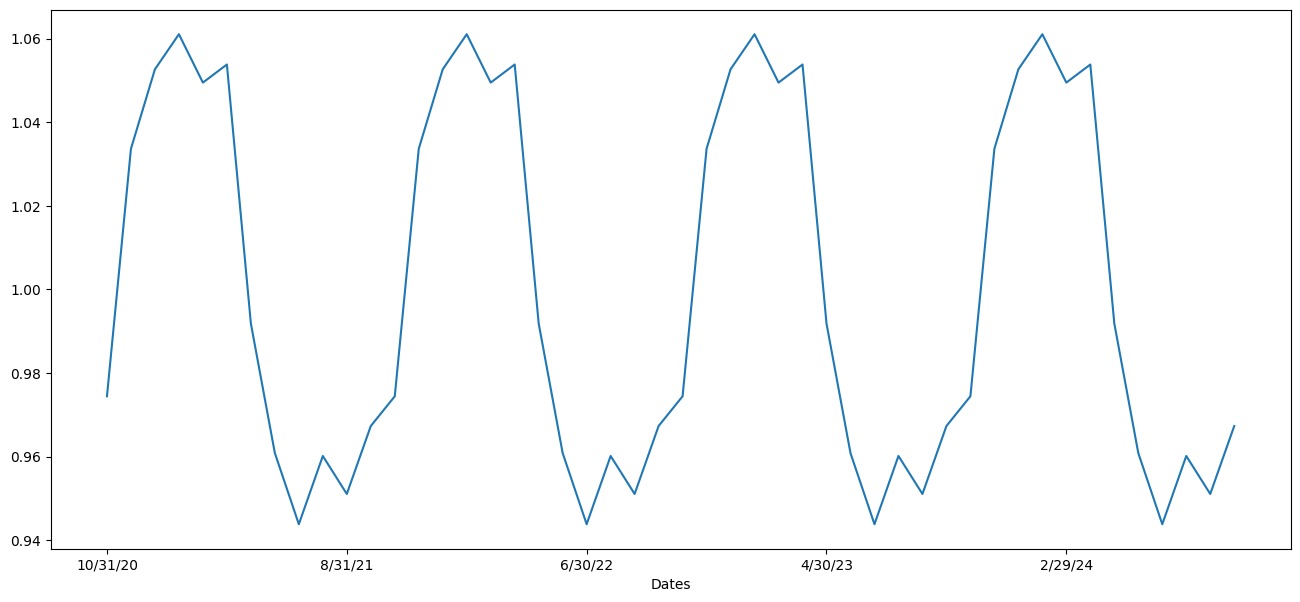

In [ ]:
plt.figure(figsize = (16,7))
result.seasonal.plot();

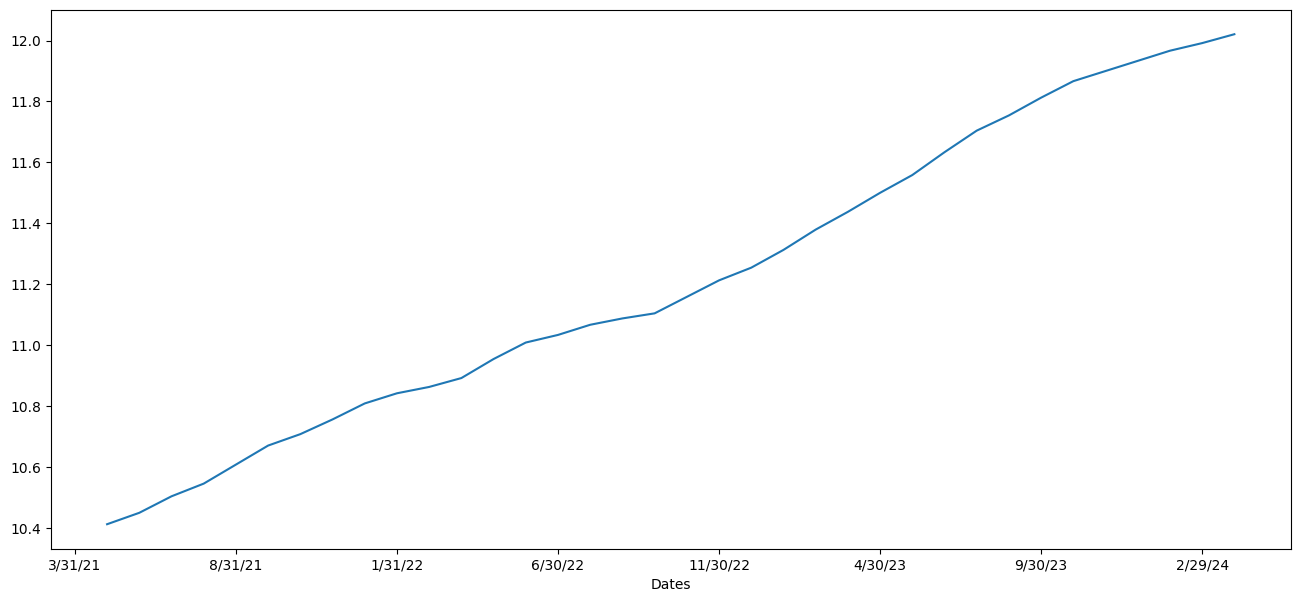

In [ ]:
plt.figure(figsize = (16,7))
result.trend.plot();

# Forecasting using SARIMA

In [ ]:
# Import data
Nat_gas_df = pd.read_csv("/content/Nat_Gas.csv")

In [ ]:
Nat_gas_df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Convert Month into Datetime
Nat_gas_df['Dates']=pd.to_datetime(Nat_gas_df['Dates'])

In [ ]:
Nat_gas_df.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


In [ ]:
Nat_gas_df.set_index('Dates',inplace=True)

In [ ]:
Nat_gas_df.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


<Axes: xlabel='Dates'>

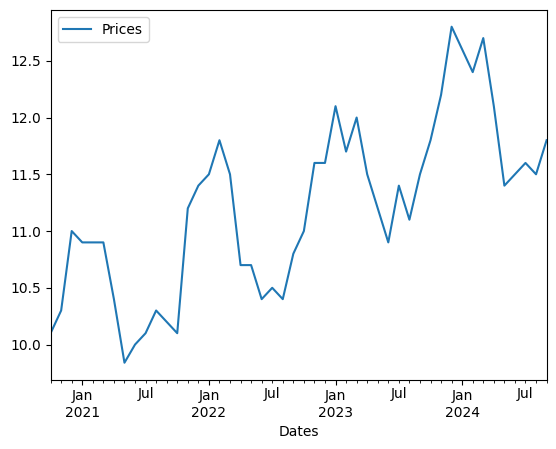

In [ ]:
Nat_gas_df.plot()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(Nat_gas_df['Prices'])


In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Prices):
    result=adfuller(Prices)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(Nat_gas_df['Prices'])


ADF Test Statistic : 0.21807686169999427
p-value : 0.973257438844869
#Lags Used : 10
Number of Observations Used : 37
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [ ]:
#Let's run auto_arima() function to get best p,d,q,P,D,Q values

pm.auto_arima(Nat_gas_df['Prices'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4,
               trace=True,error_action='ignore', suppress_warnings=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=37.147, Time=1.98 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=48.334, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=38.394, Time=0.41 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=42.336, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=46.741, Time=0.09 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=2.71 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=39.069, Time=4.75 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=38.330, Time=5.04 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=36.109, Time=1.42 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=53.197, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=53.566, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=53.701, Time=2.22 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=53.674, Time=1.34 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=51.953, Ti

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 -12.055
Date:                Sat, 17 Feb 2024   AIC                             36.109
Time:                        06:43:31   BIC                             47.210
Sample:                    10-31-2020   HQIC                            40.287
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0098      0.008      1.276      0.202      -0.005       0.025
ar.L1          1.6926      0.050     33.525      0.000       1.594       1.792
ar.L2         -0.9590      0.048    -19.946      0.000      -1.053      -0.865
ma.L1         -1.8031      0.277     -6.501      0.000      -2.347      -1.260
ma.L2          0.9498      0.307      3.094      0.002       0.348       1.552
sigma2         0.0896      0.030      3.003      0.003       0.031       0.148
===================================================================================
Ljung-Box (L1) (Q):                   6.30   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.01   Prob(JB):                         0.31
Heteroskedasticity (H):               0.86   Skew:                             0.51
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Let's split the data into train and test set

train_data = Nat_gas_df[:len(Nat_gas_df)-12]
test_data = Nat_gas_df[len(Nat_gas_df)-12:]

In [ ]:
arima_model = SARIMAX(train_data['Prices'], order = (2,1,2), seasonal_order = (1,1,1,12))
arima_result = arima_model.fit()
arima_result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               Prices   No. Observations:                   36
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                   0.168
Date:                              Sat, 17 Feb 2024   AIC                             13.664
Time:                                      06:44:01   BIC                             21.612
Sample:                                  10-31-2020   HQIC                            15.663
                                       - 09-30-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0966    174.505     -0.006      0.995    -343.119     340.926
ar.L2         -0.0968     17.037     -0.006      0.995     -33.488      33.295
ma.L1         -0.2542   2038.124     -0.000      1.000   -3994.904    3994.395
ma.L2         -0.7457   1519.857     -0.000      1.000   -2979.611    2978.119
ar.S.L12      -0.6443      0.742     -0.869      0.385      -2.098       0.809
ma.S.L12      -0.9986   2743.759     -0.000      1.000   -5378.668    5376.671
sigma2         0.0156     51.605      0.000      1.000    -101.129     101.160
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.84   Prob(JB):                         0.82
Heteroskedasticity (H):               0.92   Skew:                            -0.22
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arima_pred = arima_result.predict(start = len(train_data), end = len(Nat_gas_df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2023-10-31    11.123726
2023-11-30    12.293481
2023-12-31    12.406998
2024-01-31    12.668372
2024-02-29    12.660525
2024-03-31    12.666545
2024-04-30    11.678595
2024-05-31    11.728106
2024-06-30    11.412530
2024-07-31    11.637279
2024-08-31    11.530545
2024-09-30    11.863028
Freq: M, Name: ARIMA Predictions, dtype: float64

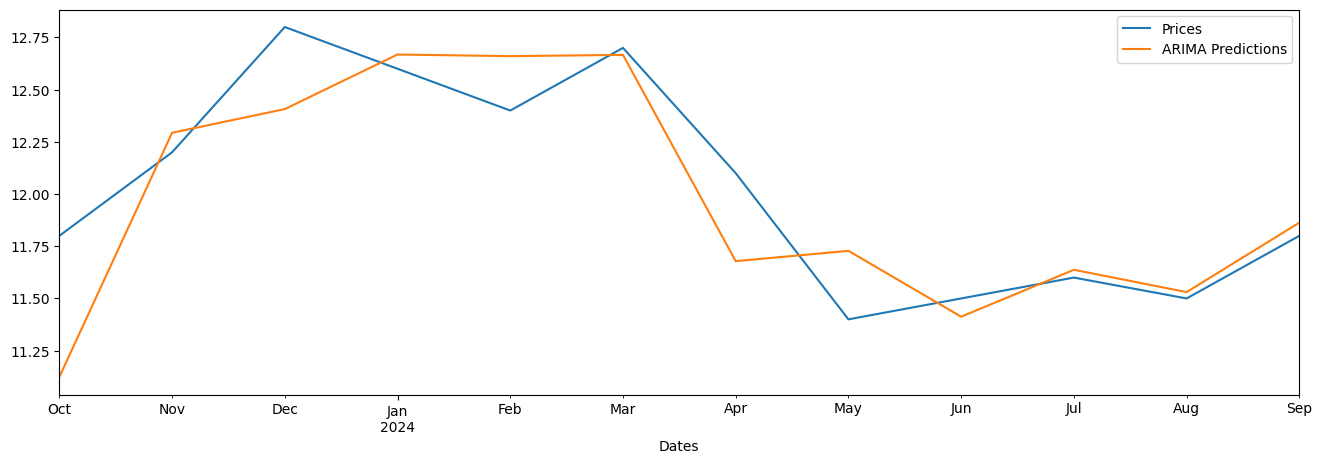

In [ ]:
test_data['Prices'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

<Axes: xlabel='Dates'>

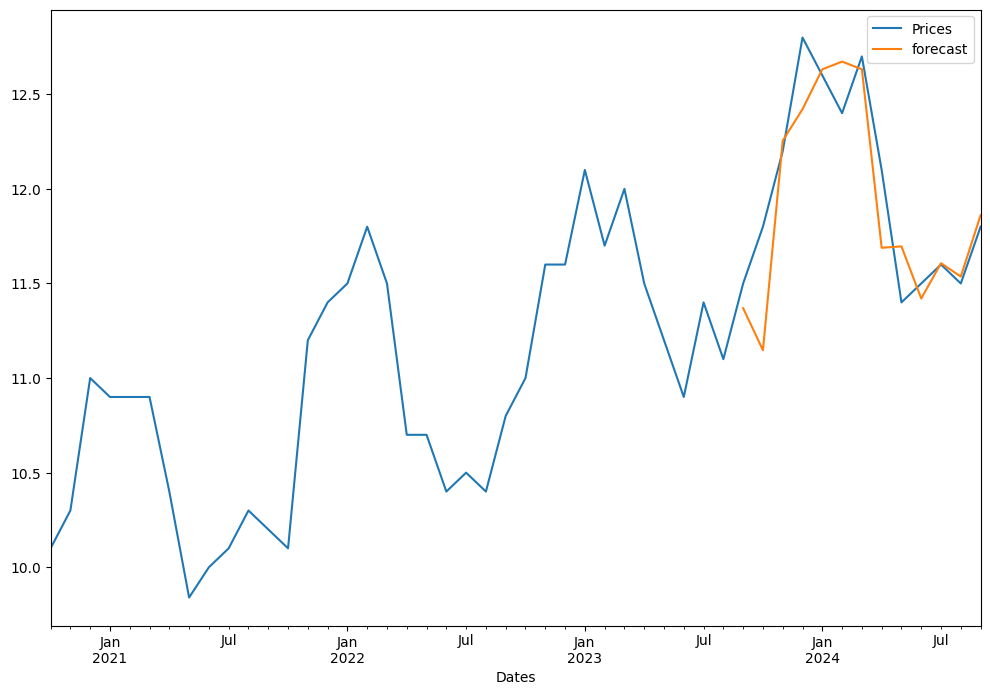

In [ ]:
Nat_gas_df['forecast']=arima_result.predict(start=35,end=47,dynamic=True)
Nat_gas_df[['Prices','forecast']].plot(figsize=(12,8))

In [ ]:
Nat_gas_df.tail(12)

,Prices,forecast
Dates,,
2023-10-31,11.8,11.147138
2023-11-30,12.2,12.254501
2023-12-31,12.8,12.421252
2024-01-31,12.6,12.632132
2024-02-29,12.4,12.672660
2024-03-31,12.7,12.632363
2024-04-30,12.1,11.688678
2024-05-31,11.4,11.695976
2024-06-30,11.5,11.420561


In [ ]:
test_data['ARIMA_Predictions'] = arima_pred


<ipython-input-43-c6fe8541f169>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA_Predictions'] = arima_pred


In [ ]:
test_data

,Prices,ARIMA_Predictions
Dates,,
2023-10-31,11.8,11.123726
2023-11-30,12.2,12.293481
2023-12-31,12.8,12.406998
2024-01-31,12.6,12.668372
2024-02-29,12.4,12.660525
2024-03-31,12.7,12.666545
2024-04-30,12.1,11.678595
2024-05-31,11.4,11.728106
2024-06-30,11.5,11.412530


In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [ ]:
arima_rmse_error = rmse(test_data['Prices'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = Nat_gas_df['Prices'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 0.08278202717733533
RMSE Error: 0.28771865976563865
Mean: 11.207083333333332


# Run entire code after entering date

In [ ]:
arima_pred_full = arima_result.predict(start = 0, end = len(Nat_gas_df)-1, typ="levels").rename("ARIMA Predictions")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
#enter Month and year in following format 'yyyy/mm/dd' -- KEEP day at end of the month AND THEN Run the ENTIRE code
#example : userdate = 2024-05-31
userdate = '2024-05-31'
arima_pred_full.loc[userdate]

11.728106042808744

In [ ]:
# Actual Price
Nat_gas_df.loc[userdate]['Prices']

11.4

# Extrapolate 1 year in the future

In [ ]:
#enter Month and year in following format 'yyyy/mm/dd' -- KEEP day at end of the month AND THEN Run the ENTIRE code
#example : userdate = 2024-05-31
userdate = '2020-12-31'
start = Nat_gas_df.index.get_loc(userdate)
arima_pred_future = arima_result.predict(start = start, end = start+12, typ="levels").rename("ARIMA Predictions")


In [ ]:
arima_pred_future.tail(1)

2021-12-31    11.271263
Freq: M, Name: ARIMA Predictions, dtype: float64

In [ ]:
# Actual Price in next 12 months
Nat_gas_df.iloc[start+12]


Prices      11.4
forecast     NaN
Name: 2021-12-31 00:00:00, dtype: float64

# Forecasting using Prophet

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


In [ ]:
#read in the data
df = pd.read_csv('Nat_Gas.csv')
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [ ]:
#Select the date and the price
df = df[['Dates', 'Prices']]
#Rename the features:
df = df.rename(columns={'Dates':'ds', 'Prices':'y'})
df.head()

,ds,y
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [ ]:
# Get last 12 rows of data and store them into a new variable
last = df[len(df)-12:]
last

,ds,y
36,10/31/23,11.8
37,11/30/23,12.2
38,12/31/23,12.8
39,1/31/24,12.6
40,2/29/24,12.4
41,3/31/24,12.7
42,4/30/24,12.1
43,5/31/24,11.4
44,6/30/24,11.5
45,7/31/24,11.6


In [ ]:
#Get all rows except the last 12
df = df[:-12]
df.head()

,ds,y
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [ ]:
#Creating Prophet Object (Model)
fbp = Prophet(seasonality_mode='multiplicative', mcmc_samples=360)

#Train the model
fbp.fit(df)
future = fbp.make_future_dataframe(periods=24, freq='M')
forecast = fbp.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1h5uixy/q10alzh2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1h5uixy/epxnohv9.json
06:45:54 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=73221', 'data', 'file=/tmp/tmpr1h5uixy/q10alzh2.json', 'init=/tmp/tmpr1h5uixy/epxnohv9.json', 'output', 'file=/tmp/tmpr1h5uixy/prophet_model6cyklx5w/prophet_model-20240217064555_1.csv', 'method=sample', 'num_samples=180', 'num_warmup=180', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=73221', 'data', 'file=/tmp/tmpr1h5uixy/q10alzh2.json', 'init=/tmp/tmpr1h5uixy/epxnohv9.json', 'output', 'file=/tmp/tmpr1h5uixy/prophet_model6cyklx5w/prophet_model-20240217064555_2.csv', 'method=sample', 'num_samples=180', 'num_warmup=180', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

06:46:02 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=73221', 'data', 'file=/tmp/tmpr1h5uixy/q10alzh2.json', 'init=/tmp/tmpr1h5uixy/epxnohv9.json', 'output', 'file=/tmp/tmpr1h5uixy/prophet_model6cyklx5w/prophet_model-20240217064555_1.csv', 'method=sample', 'num_samples=180', 'num_warmup=180', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpr1h5uixy/prophet_model6cyklx5w/prophet_model-20240217064555_1.csv
 console_msgs (if any):
	/tmp/tmpr1h5uixy/prophet_model6cyklx5w/prophet_model-20240217064555_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 180
    num_warmup = 180
    save_warmup = 0 (Default)
    thin = 1 (Defau

In [ ]:
#plot the data
plot_plotly(fbp, forecast)

In [ ]:
forecast.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
45,2024-07-31,12.535389,11.106886,12.677680,11.911101,13.156339,-0.051894,-0.089096,-0.013346,-0.051894,-0.089096,-0.013346,0.0,0.0,0.0,11.884878
46,2024-08-31,12.604677,11.551920,13.285610,11.924832,13.277577,-0.016840,-0.055053,0.021259,-0.016840,-0.055053,0.021259,0.0,0.0,0.0,12.392417
47,2024-09-30,12.671730,11.183489,13.061251,11.946135,13.402175,-0.044423,-0.081511,-0.006674,-0.044423,-0.081511,-0.006674,0.0,0.0,0.0,12.108813
48,2024-10-31,12.741018,11.546695,13.243215,11.950093,13.549812,-0.028530,-0.052552,-0.004487,-0.028530,-0.052552,-0.004487,0.0,0.0,0.0,12.377521
49,2024-11-30,12.808072,11.959019,13.974420,11.956355,13.673305,0.009519,-0.012521,0.032040,0.009519,-0.012521,0.032040,0.0,0.0,0.0,12.929997
50,2024-12-31,12.877360,12.641758,14.864465,11.961902,13.840373,0.068768,0.044218,0.096275,0.068768,0.044218,0.096275,0.0,0.0,0.0,13.762911
51,2025-01-31,12.946648,12.454308,14.858852,11.961397,13.998281,0.053385,0.025019,0.083299,0.053385,0.025019,0.083299,0.0,0.0,0.0,13.637802
52,2025-02-28,13.009231,12.612476,15.134324,11.948933,14.158263,0.063516,0.044485,0.083858,0.063516,0.044485,0.083858,0.0,0.0,0.0,13.835524
53,2025-03-31,13.078519,12.456253,15.079598,11.941862,14.319708,0.048576,0.024300,0.073283,0.048576,0.024300,0.073283,0.0,0.0,0.0,13.713817
54,2025-04-30,13.145572,11.669650,14.370990,11.948540,14.480077,-0.011876,-0.034048,0.010101,-0.011876,-0.034048,0.010101,0.0,0.0,0.0,12.989453


In [ ]:
#Show the models prediction for 8/31/24
forecast[forecast.ds == '8/31/24']['yhat']

46    12.392417
Name: yhat, dtype: float64

In [ ]:
#Actual price for 8/31/24
last[last.ds == '8/31/24']['y']

46    11.5
Name: y, dtype: float64

# Run entire code after entering date

In [ ]:
future = fbp.make_future_dataframe(periods=120, freq='MS')
forecast = fbp.predict(future)

#enter Month and year in following format 'mm/01/yy' -- KEEP day @ '01' AND THEN Run the ENTIRE code
#example : userdate = 01/01/24
userdate = '01/01/24'
forecast[forecast.ds == userdate]['yhat']

39    13.102079
Name: yhat, dtype: float64

In [ ]:
#Actual price for user date
last[last.ds == '1/31/24']['y']

39    12.6
Name: y, dtype: float64

In [ ]:
forecast[forecast.ds == userdate].index.values

array([39])

In [ ]:
# Forecast of Price next 12 months
T = forecast[forecast.ds == userdate].index.values +12
forecast.iloc[T]['yhat']

51    14.649085
Name: yhat, dtype: float64